**Imports**

In [ ]:
# Imports
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PyTorch libraries
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

## The Basics of PyTorch

PyTorch is a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy optimized for the power of GPUs
-  A deep learning platform that provides significant flexibility
   and speed

At its core, PyTorch provides a few key features:

- A multidimensional [Tensor](https://pytorch.org/docs/stable/tensors.html) object, similar to [NumPy Array](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) but with GPU acceleration.
- An optimized **autograd** engine for automatically computing derivatives.
- A clean, modular API for building and deploying **deep learning models**.

You can find more information about PyTorch in the Appendix.

### Creating Tensors

In [ ]:
# We can construct a tensor directly from some common python iterables,
# such as list and tuple nested iterables can also be handled as long as the
# dimensions are compatible

# tensor from a list
a = torch.tensor([0, 1, 2])

#tensor from a tuple of tuples
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)

# tensor from a numpy array
c = np.ones([2, 3])
c = torch.tensor(c)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")
print(f"Tensor c: {c}")

Tensor a: tensor([0, 1, 2])
Tensor b: tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
Tensor c: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


**Some common tensor constructors:**


In [ ]:
# The numerical arguments we pass to these constructors
# determine the shape of the output tensor

x = torch.ones(5, 3)
y = torch.zeros(2)
z = torch.empty(1, 1, 5)
print(f"Tensor x: {x}")
print(f"Tensor y: {y}")
print(f"Tensor z: {z}")

Tensor x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Tensor y: tensor([0., 0.])
Tensor z: tensor([[[ 5.2547e-33,  0.0000e+00,  5.7508e-33,  0.0000e+00, -5.1499e+22]]])


In [ ]:
# There are also constructors for random numbers

# Uniform distribution
a = torch.rand(1, 3)

# Normal distribution
b = torch.randn(3, 4)

# There are also constructors that allow us to construct
# a tensor according to the above constructors, but with
# dimensions equal to another tensor.

c = torch.zeros_like(a)
d = torch.rand_like(c)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")
print(f"Tensor c: {c}")
print(f"Tensor d: {d}")

Tensor a: tensor([[0.7383, 0.0633, 0.3850]])
Tensor b: tensor([[ 1.8567, -0.9696,  1.8487, -0.7370],
        [ 2.3154, -1.5702, -0.0621,  1.7757],
        [ 1.8806,  0.8528,  1.3858, -1.2380]])
Tensor c: tensor([[0., 0., 0.]])
Tensor d: tensor([[0.3879, 0.1774, 0.1008]])


*Reproducibility*:

- PyTorch Random Number Generator (RNG): You can use `torch.manual_seed()` to seed the RNG for all devices (both CPU and GPU):

```python
import torch
torch.manual_seed(0)
```
- For custom operators, you might need to set python seed as well:

```python
import random
random.seed(0)
```

- Random number generators in other libraries (e.g., NumPy):

```python
import numpy as np
np.random.seed(0)
```

Here, we define for you a function called `set_seed` that does the job for you!

In [ ]:
def set_seed(seed=None, seed_torch=True):
  """
  Function that controls randomness. NumPy and random modules must be imported.

  Args:
    seed : Integer
      A non-negative integer that defines the random state. Default is `None`.
    seed_torch : Boolean
      If `True` sets the random seed for pytorch tensors, so pytorch module
      must be imported. Default is `True`.

  Returns:
    Nothing.
  """
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')

Now, let's use the `set_seed` function in the previous example. Execute the cell multiple times to verify that the numbers printed are always the same.

In [ ]:
def simplefun(seed=True, my_seed=None):
  """
  Helper function to verify effectiveness of set_seed attribute

  Args:
    seed: Boolean
      Specifies if seed value is provided or not
    my_seed: Integer
      Initializes seed to specified value

  Returns:
    Nothing
  """
  if seed:
    set_seed(seed=my_seed)

  # uniform distribution
  a = torch.rand(1, 3)
  # normal distribution
  b = torch.randn(3, 4)

  print("Tensor a: ", a)
  print("Tensor b: ", b)

In [ ]:
simplefun(seed=True, my_seed=0)  # Turn `seed` to `False` or change `my_seed`

Random seed 0 has been set.
Tensor a:  tensor([[0.4963, 0.7682, 0.0885]])
Tensor b:  tensor([[ 0.3643,  0.1344,  0.1642,  0.3058],
        [ 0.2100,  0.9056,  0.6035,  0.8110],
        [-0.0451,  0.8797,  1.0482, -0.0445]])


**Numpy-like number ranges:**

The ```.arange()``` and ```.linspace()``` behave how you would expect them to if you are familar with numpy.

In [ ]:
a = torch.arange(0, 10, step=1)
b = np.arange(0, 10, step=1)

c = torch.linspace(0, 5, steps=11)
d = np.linspace(0, 5, num=11)

print(f"Tensor a: {a}\n")
print(f"Numpy array b: {b}\n")
print(f"Tensor c: {c}\n")
print(f"Numpy array d: {d}\n")

Tensor a: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Numpy array b: [0 1 2 3 4 5 6 7 8 9]

Tensor c: tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])

Numpy array d: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]



### Operations in PyTorch



**Tensor-Tensor operations**

We can perform operations on tensors using methods under `torch.`

In [ ]:
a = torch.ones(5, 3)
b = torch.rand(5, 3)
c = torch.empty(5, 3)
d = torch.empty(5, 3)

# this only works if c and d already exist
torch.add(a, b, out=c)

# Pointwise Multiplication of a and b
torch.multiply(a, b, out=d)

print(c)
print(d)

tensor([[1.0362, 1.1852, 1.3734],
        [1.3051, 1.9320, 1.1759],
        [1.2698, 1.1507, 1.0317],
        [1.2081, 1.9298, 1.7231],
        [1.7423, 1.5263, 1.2437]])
tensor([[0.0362, 0.1852, 0.3734],
        [0.3051, 0.9320, 0.1759],
        [0.2698, 0.1507, 0.0317],
        [0.2081, 0.9298, 0.7231],
        [0.7423, 0.5263, 0.2437]])


However, in PyTorch, most common Python operators are overridden.
The common standard arithmetic operators ($+$, $-$, $*$, $/$, and $**$) have all been lifted to elementwise operations

In [ ]:
x = torch.tensor([1, 2, 4, 8])
y = torch.tensor([1, 2, 3, 4])
x + y, x - y, x * y, x / y, x**y  # The `**` is the exponentiation operator

(tensor([ 2,  4,  7, 12]),
 tensor([0, 0, 1, 4]),
 tensor([ 1,  4, 12, 32]),
 tensor([1.0000, 1.0000, 1.3333, 2.0000]),
 tensor([   1,    4,   64, 4096]))

**Tensor Methods**

Tensors also have a number of common arithmetic operations built in.

All of these operations should have similar syntax to their numpy equivalents.

In [ ]:
x = torch.rand(3, 3)
print(x)
print("\n")
# sum() - note the axis is the axis you move across when summing
print(f"Sum of every element of x: {x.sum()}")
print(f"Sum of the columns of x: {x.sum(axis=0)}")
print(f"Sum of the rows of x: {x.sum(axis=1)}")
print("\n")

print(f"Mean value of all elements of x {x.mean()}")
print(f"Mean values of the columns of x {x.mean(axis=0)}")
print(f"Mean values of the rows of x {x.mean(axis=1)}")

tensor([[0.5846, 0.0332, 0.1387],
        [0.2422, 0.8155, 0.7932],
        [0.2783, 0.4820, 0.8198]])


Sum of every element of x: 4.187318325042725
Sum of the columns of x: tensor([1.1051, 1.3306, 1.7517])
Sum of the rows of x: tensor([0.7565, 1.8509, 1.5800])


Mean value of all elements of x 0.46525758504867554
Mean values of the columns of x tensor([0.3684, 0.4435, 0.5839])
Mean values of the rows of x tensor([0.2522, 0.6170, 0.5267])


**Matrix Operations**

The `@` symbol is overridden to represent matrix multiplication. You can also use `torch.matmul()` to multiply tensors. For dot multiplication, you can use `torch.dot()`, or manipulate the axes of your tensors and do matrix multiplication (we will cover that in the next section).

Transposes of 2D tensors are obtained using `torch.t()` or `Tensor.T`. Note the lack of brackets for `Tensor.T` - it is an attribute, not a method.



Below are two expressions involving operations on matrices.

\begin{equation}
\textbf{A} =
\begin{bmatrix}2 &4 \\5 & 7
\end{bmatrix}
\begin{bmatrix} 1 &1 \\2 & 3
\end{bmatrix}
+
\begin{bmatrix}10 & 10  \\ 12 & 1
\end{bmatrix}
\end{equation}


and


\begin{equation}
b =
\begin{bmatrix} 3 \\ 5 \\ 7
\end{bmatrix} \cdot
\begin{bmatrix} 2 \\ 4 \\ 8
\end{bmatrix}
\end{equation}

The code block below that computes these expressions using PyTorch

In [ ]:
def simple_operations(a1: torch.Tensor, a2: torch.Tensor, a3: torch.Tensor):
  """
  Helper function to demonstrate simple operations
  i.e., Multiplication of tensor a1 with tensor a2 and then add it with tensor a3

  Args:
    a1: Torch tensor
      Tensor of size ([2,2])
    a2: Torch tensor
      Tensor of size ([2,2])
    a3: Torch tensor
      Tensor of size ([2,2])

  Returns:
    answer: Torch tensor
      Tensor of size ([2,2]) resulting from a1 multiplied with a2, added with a3
  """


  result =  a1 @ a2 + a3
  return result


# init our tensors
a1 = torch.tensor([[2, 4], [5, 7]])
a2 = torch.tensor([[1, 1], [2, 3]])
a3 = torch.tensor([[10, 10], [12, 1]])
A = simple_operations(a1, a2, a3)
print(A)

tensor([[20, 24],
        [31, 27]])


In [ ]:
def dot_product(b1: torch.Tensor, b2: torch.Tensor):
  """
  Helper function to demonstrate dot product operation
  Dot product is an algebraic operation that takes two equal-length sequences
  (usually coordinate vectors), and returns a single number.
  Geometrically, it is the product of the Euclidean magnitudes of the
  two vectors and the cosine of the angle between them.

  Args:
    b1: Torch tensor
      Tensor of size ([3])
    b2: Torch tensor
      Tensor of size ([3])

  Returns:
    product: Tensor
      Tensor of size ([1]) resulting from b1 scalar multiplied with b2
  """
  # Use torch.dot() to compute the dot product of two tensors
  product = torch.dot(b1, b2)
  return product

b1 = torch.tensor([3, 5, 7])
b2 = torch.tensor([2, 4, 8])
b = dot_product(b1, b2)
print(b)

tensor(82)


### Manipulating Tensors in Pytorch

**Indexing**

Just as in numpy, elements in a tensor can be accessed by index. As in any numpy array, the first element has index 0 and ranges are specified to include the first to last_element-1. We can access elements according to their relative position to the end of the list by using negative indices. Indexing is also referred to as slicing.

For example, `[-1]` selects the last element; `[1:3]` selects the second and the third elements, and `[:-2]` will select all elements excluding the last and second-to-last elements.

In [ ]:
x = torch.arange(0, 10)
print(x)
print(x[-1])
print(x[1:3])
print(x[:-2])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor(9)
tensor([1, 2])
tensor([0, 1, 2, 3, 4, 5, 6, 7])


When we have multidimensional tensors, indexing rules work the same way as NumPy.

In [ ]:
# make a 5D tensor
x = torch.rand(1, 2, 3, 4, 5)

print(f" shape of x[0]:{x[0].shape}")
print(f" shape of x[0][0]:{x[0][0].shape}")
print(f" shape of x[0][0][0]:{x[0][0][0].shape}")

 shape of x[0]:torch.Size([2, 3, 4, 5])
 shape of x[0][0]:torch.Size([3, 4, 5])
 shape of x[0][0][0]:torch.Size([4, 5])


**Flatten and reshape**

There are various methods for reshaping tensors. It is common to have to express 2D data in 1D format. Similarly, it is also common to have to reshape a 1D tensor into a 2D tensor. We can achieve this with the `.flatten()` and `.reshape()` methods.

In [ ]:
z = torch.arange(12).reshape(6, 2)
print(f"Original z: \n {z}")

# 2D -> 1D
z = z.flatten()
print(f"Flattened z: \n {z}")

# and back to 2D
z = z.reshape(3, 4)
print(f"Reshaped (3x4) z: \n {z}")

Original z: 
 tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
Flattened z: 
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Reshaped (3x4) z: 
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


You will also see the `.view()` methods used a lot to reshape tensors. There is a subtle difference between `.view()` and `.reshape()`, though for now we will just use `.reshape()`.

**Squeezing tensors**

When processing batches of data, you will quite often be left with singleton dimensions. E.g., `[1,10]` or `[256, 1, 3]`. This dimension can quite easily mess up your matrix operations if you don't plan on it being there...

In order to compress tensors along their singleton dimensions we can use the `.squeeze()` method. We can use the `.unsqueeze()` method to do the opposite.

In [ ]:
x = torch.randn(1, 10)
# printing the zeroth element of the tensor will not give us the first number!

print(x.shape)
print(f"x[0]: {x[0]}")

torch.Size([1, 10])
x[0]: tensor([-0.7391,  0.8027, -0.6817, -0.1335,  0.0658, -0.5919,  0.7670,  0.6899,
         0.3282,  0.5085])


Because of that pesky singleton dimension, `x[0]` gave us the first row instead!

In [ ]:
# Let's get rid of that singleton dimension and see what happens now
x = x.squeeze(0)
print(x.shape)
print(f"x[0]: {x[0]}")

torch.Size([10])
x[0]: -0.7390837073326111


In [ ]:
# Adding singleton dimensions works a similar way, and is often used when tensors
# being added need same number of dimensions

y = torch.randn(5, 5)
print(f"Shape of y: {y.shape}")

# lets insert a singleton dimension
y = y.unsqueeze(1)
print(f"Shape of y: {y.shape}")

Shape of y: torch.Size([5, 5])
Shape of y: torch.Size([5, 1, 5])


**Permutation**

Sometimes our dimensions will be in the wrong order! For example, we may be dealing with RGB images with dim $[3\times48\times64]$, but our pipeline expects the colour dimension to be the last dimension, i.e., $[48\times64\times3]$. To get around this we can use the `.permute()` method.

In [ ]:
# `x` has dimensions [color,image_height,image_width]
x = torch.rand(3, 48, 64)

# We want to permute our tensor to be [ image_height , image_width , color ]
x = x.permute(1, 2, 0)
# permute(1,2,0) means:
# The 0th dim of my new tensor = the 1st dim of my old tensor
# The 1st dim of my new tensor = the 2nd
# The 2nd dim of my new tensor = the 0th
print(x.shape)

torch.Size([48, 64, 3])


You may also see `.transpose()` used. This works in a similar way as permute, but can only swap two dimensions at once.

**Concatenation**

In this example, we concatenate two matrices along rows (axis 0, the first element of the shape) vs. columns (axis 1, the second element of the shape). We can see that the first output tensor’s axis-0 length (`6`) is the sum of the two input tensors’ axis-0 lengths (`3+3`); while the second output tensor’s axis-1 length (`8`) is the sum of the two input tensors’ axis-1 lengths (`4+4`).

In [ ]:
# Create two tensors of the same shape
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])


# Concatenate along rows
cat_rows = torch.cat((x, y), dim=0)

# Concatenate along columns
cat_cols = torch.cat((x, y), dim=1)

# Printing outputs
print('Concatenated by rows: shape{} \n {}'.format(list(cat_rows.shape), cat_rows))
print('\n Concatenated by colums: shape{}  \n {}'.format(list(cat_cols.shape), cat_cols))

Concatenated by rows: shape[6, 4] 
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

 Concatenated by colums: shape[3, 8]  
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


**Conversion to Other Python Objects**

Converting a tensor to a numpy.ndarray, or vice versa, is easy, and the converted result does not share memory. This minor inconvenience is quite important: when you perform operations on the CPU or GPUs, you do not want to halt computation, waiting to see whether the NumPy package of Python might want to be doing something else with the same chunk of memory.

When converting to a NumPy array, the information being tracked by the tensor will be lost, i.e., the computational graph. This will be covered in detail when you are introduced to autograd tomorrow!

In [ ]:
x = torch.randn(5)
print(f"x: {x}  |  x type:  {x.type()}")

y = x.numpy()
print(f"y: {y}  |  y type:  {type(y)}")

z = torch.tensor(y)
print(f"z: {z}  |  z type:  {z.type()}")

x: tensor([ 0.2659, -0.5148, -0.0613,  0.5046,  0.1385])  |  x type:  torch.FloatTensor
y: [ 0.26593232 -0.5148316  -0.06128114  0.5046449   0.13848118]  |  y type:  <class 'numpy.ndarray'>
z: tensor([ 0.2659, -0.5148, -0.0613,  0.5046,  0.1385])  |  z type:  torch.FloatTensor


To convert a size-1 tensor to a Python scalar, we can invoke the item function or Python’s built-in functions.

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### GPUs


By default, when we create a tensor it will *not* live on the GPU!

In [ ]:
x = torch.randn(10)
print(x.device)

cpu


When using Colab notebooks, by default, will not have access to a GPU. In order to start using GPUs we need to request one. We can do this by going to the runtime tab at the top of the page.

By following *Runtime* → *Change runtime type* and selecting **GPU** from the *Hardware Accelerator* dropdown list, we can start playing with sending tensors to GPUs.

Once you have done this your runtime will restart and you will need to rerun the first setup cell to reimport PyTorch. Then proceed to the next cell.



**Now we have a GPU.**


The cell below should return `True`.

In [ ]:
print(torch.cuda.is_available())

True


[CUDA](https://developer.nvidia.com/cuda-toolkit) is an API developed by Nvidia for interfacing with GPUs. PyTorch provides us with a layer of abstraction, and allows us to launch CUDA kernels using pure Python.

In short, we get the power of parallelizing our tensor computations on GPUs, whilst only writing (relatively) simple Python!

Here, we define the function `set_device`, which returns the device use in the notebook, i.e., `cpu` or `cuda`. Unless otherwise specified, we use this function on top of every tutorial, and we store the device variable such as

```python
DEVICE = set_device()
```

Let's define the function using the PyTorch package `torch.cuda`, which is lazily initialized, so we can always import it, and use `is_available()` to determine if our system supports CUDA.

In [ ]:
def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("GPU is not enabled in this notebook. \n"
          "If you want to enable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `GPU` from the dropdown menu")
  else:
    print("GPU is enabled in this notebook. \n"
          "If you want to disable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `None` from the dropdown menu")

  return device

Let's make some CUDA tensors!

In [ ]:
# common device agnostic way of writing code that can run on cpu OR gpu
# that we provide for you in each of the tutorials
DEVICE = set_device()

# we can specify a device when we first create our tensor
x = torch.randn(2, 2, device=DEVICE)
print(x.dtype)
print(x.device)

# we can also use the .to() method to change the device a tensor lives on
y = torch.randn(2, 2)
print(f"y before calling to() | device: {y.device} | dtype: {y.type()}")

y = y.to(DEVICE)
print(f"y after calling to() | device: {y.device} | dtype: {y.type()}")

GPU is enabled in this notebook. 
If you want to disable it, in the menu under `Runtime` -> 
`Hardware accelerator.` and select `None` from the dropdown menu
torch.float32
cuda:0
y before calling to() | device: cpu | dtype: torch.FloatTensor
y after calling to() | device: cuda:0 | dtype: torch.cuda.FloatTensor


**Operations between cpu tensors and cuda tensors**

Note that the type of the tensor changed after calling `.to()`. What happens if we try and perform operations on tensors on devices?

We cannot combine CUDA tensors and CPU tensors in this fashion. If we want to compute an operation that combines tensors on different devices, we need to move them first! We can use the `.to()` method as before, or the `.cpu()` and `.cuda()` methods. Note that using the `.cuda()` will throw an error, if CUDA is not enabled in your machine.

Generally, in this course, all Deep Learning is done on the GPU, and any computation is done on the CPU, so sometimes we have to pass things back and forth, so you'll see us call.

In [ ]:
x = torch.tensor([0, 1, 2], device=DEVICE)
y = torch.tensor([3, 4, 5], device="cpu")
z = torch.tensor([6, 7, 8], device=DEVICE)

# moving to cpu
x = x.to("cpu")  # alternatively, you can use x = x.cpu()
print(x + y)

# moving to gpu
y = y.to(DEVICE)  # alternatively, you can use y = y.cuda()
print(y + z)

tensor([3, 5, 7])
tensor([ 9, 11, 13], device='cuda:0')


**Acknowledgements**

Code adopted from the Deep Learning Summer School offered by Neuromatch Academy

https://deeplearning.neuromatch.io/tutorials/intro.html

# Neural Networks:

## Perceptron

**Imports**

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

**Preparing the dataset**

In [ ]:
##########################
### DATASET
##########################

data = np.genfromtxt('https://raw.githubusercontent.com/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/main/Data/Week%204/perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int_)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


In [ ]:
X_train.std(axis=0)

array([1., 1.])

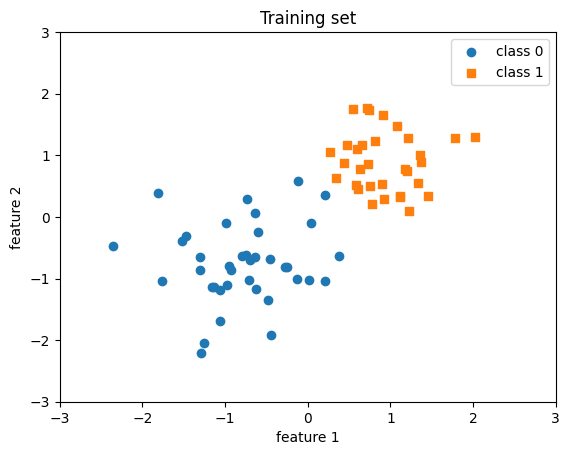

In [ ]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

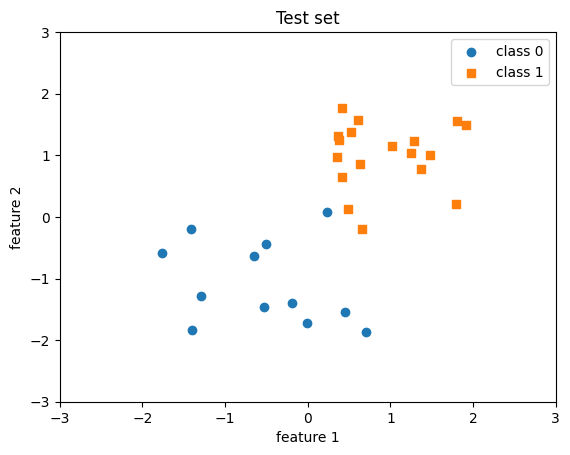

In [ ]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

### Perceptron using Numpy

**Defining the Perceptron model**

In [ ]:
class Perceptron_numpy():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float32)
        self.bias = np.zeros(1, dtype=np.float32)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias # comp. net input
        predictions = np.where(linear > 0., 1, 0)
        return predictions

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs):
        for e in range(epochs):

            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors

    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

**Training the Perceptron**

In [ ]:
ppn_numpy = Perceptron_numpy(num_features=2)

ppn_numpy.train(X_train, y_train, epochs=5)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn_numpy.weights)
print('  Bias: %s\n' % ppn_numpy.bias)

Model parameters:


  Weights: [[1.2734085]
 [1.3464228]]

  Bias: [-1.]



**Evaluating the model**

In [ ]:
train_acc = ppn_numpy.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [ ]:
test_acc = ppn_numpy.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


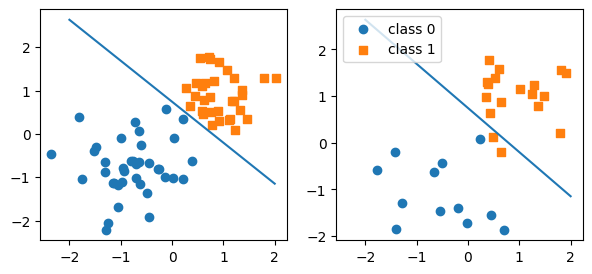

In [ ]:
##########################
### 2D Decision Boundary
##########################

w, b = ppn_numpy.weights, ppn_numpy.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0])
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0])
          / w[1] )

# x0*w0 + x1*w1 + b = 0
# x1  = (-x0*w0 - b) / w1


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()

### Perceptron using PyTorch

**Defining the Perceptron model**

In [ ]:
device = "cpu"


class Perceptron_torch():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1,
                                   dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)

        # placeholder vectors so they don't
        # need to be recreated each time
        self.ones = torch.ones(1)
        self.zeros = torch.zeros(1)

    def forward(self, x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs):
        for e in range(epochs):

            for i in range(y.shape[0]):
                # use view because backward expects a matrix (i.e., 2D tensor)
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors

    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy

**Training the Perceptron**

In [ ]:
ppn_torch = Perceptron_torch(num_features=2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn_torch.train(X_train_tensor, y_train_tensor, epochs=5)

print('Model parameters:')
print('  Weights: %s' % ppn_torch.weights)
print('  Bias: %s' % ppn_torch.bias)

Model parameters:
  Weights: tensor([[1.2734],
        [1.3464]])
  Bias: tensor([-1.])


**Evaluating the model**

In [ ]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = ppn_torch.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


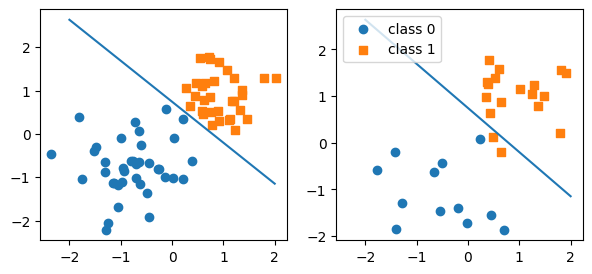

In [ ]:
##########################
### 2D Decision Boundary
##########################

w, b = ppn_torch.weights, ppn_torch.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0])
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0])
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].plot([x0_min, x0_max], [x1_min, x1_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()

**Acknowledgements**

Code adopted from the excellent lectures of Sebastian Raschka

https://sebastianraschka.com/blog/2021/dl-course.html

# Feedforward Neural Networks and Backpropagation

**Imports**

In [ ]:
import torch
import numpy as np
from torch import nn
from math import pi
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

**Helper Functions for Plotting**

In [ ]:
def ex1_plot(fun_z, fun_dz):
  """
  Plots the function and gradient vectors

  Args:
    fun_z: f.__name__
      Function implementing sine function
    fun_dz: f.__name__
      Function implementing sine function as gradient vector

  Returns:
    Nothing
  """
  x, y = np.arange(-3, 3.01, 0.02), np.arange(-3, 3.01, 0.02)
  xx, yy = np.meshgrid(x, y, sparse=True)
  zz = fun_z(xx, yy)
  xg, yg = np.arange(-2.5, 2.6, 0.5), np.arange(-2.5, 2.6, 0.5)
  xxg, yyg = np.meshgrid(xg, yg, sparse=True)
  zxg, zyg = fun_dz(xxg, yyg)

  plt.figure(figsize=(8, 7))
  plt.title("Gradient vectors point towards steepest ascent")
  contplt = plt.contourf(x, y, zz, levels=20)
  plt.quiver(xxg, yyg, zxg, zyg, scale=50, color='r', )
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  ax = plt.gca()
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  cbar = plt.colorbar(contplt, cax=cax)
  cbar.set_label('$z = h(x, y)$')

  plt.show()

## Gradient Descent Algorithm

Since the goal of most learning algorithms is **minimizing the risk (also known as the cost or loss) function**, optimization is often the core of most machine learning techniques! The gradient descent algorithm, along with its variations such as stochastic gradient descent, is one of the most powerful and popular optimization methods used for deep learning.

### Gradient vector

Given the following function:

\begin{equation}
z = h(x, y) = \sin(x^2 + y^2)
\end{equation}

find the gradient vector:

\begin{equation}
  \begin{bmatrix}
  \dfrac{\partial z}{\partial x} \\ \\ \dfrac{\partial z}{\partial y}
  \end{bmatrix}
\end{equation}


*Hint: Use the chain rule!*

**Chain rule**: For a composite function $F(x) = g(h(x)) \equiv (g \circ h)(x)$:

\begin{equation}
F'(x) = g'(h(x)) \cdot h'(x)
\end{equation}

or differently denoted:

\begin{equation}
\frac{dF}{dx} = \frac{dg}{dh} ~ \frac{dh}{dx}
\end{equation}

---
#### Solution:
We can rewrite the function as a composite function:

\begin{equation}
z = f\left( g(x,y) \right), ~~ f(u) = \sin(u), ~~ g(x, y) = x^2 + y^2
\end{equation}

Using the [chain rule](https://en.wikipedia.org/wiki/Chain_rule):

\begin{align}
\dfrac{\partial z}{\partial x} &= \dfrac{\partial f}{\partial g} \dfrac{\partial g}{\partial x} = \cos(g(x,y)) ~ (2x) = \cos(x^2 + y^2) \cdot 2x \\ \\
\dfrac{\partial z}{\partial y} &= \dfrac{\partial f}{\partial g} \dfrac{\partial g}{\partial y} = \cos(g(x,y)) ~ (2y) = \cos(x^2 + y^2) \cdot 2y
\end{align}

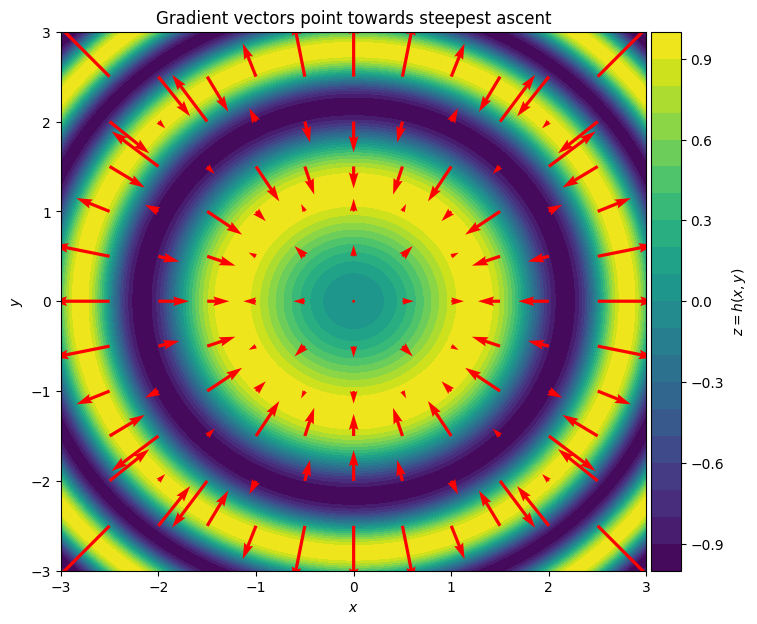

In [ ]:
def fun_z(x, y):
  """
  Implements function sin(x^2 + y^2)

  Args:
    x: (float, np.ndarray)
      Variable x
    y: (float, np.ndarray)
      Variable y

  Returns:
    z: (float, np.ndarray)
      sin(x^2 + y^2)
  """
  z = np.sin(x**2 + y**2)
  return z


def fun_dz(x, y):
  """
  Implements function sin(x^2 + y^2)

  Args:
    x: (float, np.ndarray)
      Variable x
    y: (float, np.ndarray)
      Variable y

  Returns:
    Tuple of gradient vector for sin(x^2 + y^2)
  """

  dz_dx = 2 * x * np.cos(x**2 + y**2)
  dz_dy = 2 * y * np.cos(x**2 + y**2)
  return (dz_dx, dz_dy)

ex1_plot(fun_z, fun_dz)

We can see from the plot that for any given $x_0$ and $y_0$, the gradient vector $\left[ \dfrac{\partial z}{\partial x}, \dfrac{\partial z}{\partial y}\right]^{\top}_{(x_0, y_0)}$ points in the direction of $x$ and $y$ for which $z$ increases the most. It is important to note that gradient vectors only see their local values, not the whole landscape! Also, length (size) of each vector, which indicates the steepness of the function, can be very small near local plateaus (i.e. minima or maxima).

Thus, we can simply use the aforementioned formula to find the local minima.

In 1847, Augustin-Louis Cauchy used **negative of gradients**  to develop the Gradient Descent algorithm as an **iterative** method to **minimize** a **continuous** and (ideally) **differentiable function** of **many variables**.

### Gradient Descent Algorithm

Let $f(\mathbf{w}): \mathbb{R}^d \rightarrow \mathbb{R}$ be a differentiable function. Gradient Descent is an iterative algorithm for minimizing the function $f$, starting with an initial value for variables $\mathbf{w}$, taking steps of size $\eta$ (learning rate) in the direction of the negative gradient at the current point to update the variables $\mathbf{w}$.

\begin{equation}
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta \nabla f \left( \mathbf{w}^{(t)} \right)
\end{equation}

where $\eta > 0$ and $\nabla f (\mathbf{w})= \left( \frac{\partial f(\mathbf{w})}{\partial w_1}, ..., \frac{\partial f(\mathbf{w})}{\partial w_d} \right)$. Since negative gradients always point locally in the direction of steepest descent, the algorithm makes small steps at each point **towards** the minimum.
  
<br/>

**Vanilla Algorithm**

---
> **Inputs:** initial guess $\mathbf{w}^{(0)}$, step size $\eta > 0$, number of steps $T$.

> **For** $t = 0, 1, 2, \dots , T-1$ **do** \
$\qquad$ $\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta \nabla f \left( \mathbf{w}^{(t)} \right)$\
**end**

> **Return:** $\mathbf{w}^{(t+1)}$

---

<br/>

Hence, all we need is to calculate the gradient of the loss function with respect to the learnable parameters (i.e., weights):

\begin{equation}
\dfrac{\partial Loss}{\partial \mathbf{w}} = \left[ \dfrac{\partial Loss}{\partial w_1}, \dfrac{\partial Loss}{\partial w_2} , \dots, \dfrac{\partial Loss}{\partial w_d} \right]^{\top}
\end{equation}

##  PyTorch AutoGrad


Deep learning frameworks such as PyTorch, JAX, and TensorFlow come with a very efficient and sophisticated set of algorithms, commonly known as Automatic Differentiation. AutoGrad is PyTorch's automatic differentiation engine.

### Forward Propagation



Everything starts with the forward propagation (pass). PyTorch tracks all the instructions, as we declare the variables and operations, and it builds the graph when we call the `.backward()` pass. PyTorch rebuilds the graph every time we iterate or change it (or simply put, PyTorch uses a dynamic graph).

For gradient descent, it is only required to have the gradients of cost function with respect to the variables we wish to learn. These variables are often called "learnable / trainable parameters" or simply "parameters" in PyTorch. In neural nets, weights and biases are often the learnable parameters.

#### Buiding a Computational Graph

In PyTorch, to indicate that a certain tensor contains learnable parameters, we can set the optional argument `requires_grad` to `True`. PyTorch will then track every operation using this tensor while configuring the computational graph. For this code snippet, use the provided tensors to build the following graph, which implements a single neuron with scalar input and output.

<br>

<center><img src="https://raw.githubusercontent.com/NeuromatchAcademy/course-content-dl/main/tutorials/W1D2_LinearDeepLearning/static/simple_graph.png" alt="Simple nn graph" width="600"/></center>

In [ ]:
class SimpleGraph:
  """
  Implementing Simple Computational Graph
  """

  def __init__(self, w, b):
    """
    Initializing the SimpleGraph

    Args:
      w: float
        Initial value for weight
      b: float
        Initial value for bias

    Returns:
      Nothing
    """
    assert isinstance(w, float)
    assert isinstance(b, float)
    self.w = torch.tensor([w], requires_grad=True)
    self.b = torch.tensor([b], requires_grad=True)

  def forward(self, x):
    """
    Forward pass

    Args:
      x: torch.Tensor
        1D tensor of features

    Returns:
      prediction: torch.Tensor
        Model predictions
    """
    assert isinstance(x, torch.Tensor)

    prediction = torch.tanh(x * self.w + self.b)
    return prediction


def sq_loss(y_true, y_prediction):
  """
  L2 loss function

  Args:
    y_true: torch.Tensor
      1D tensor of target labels
    y_prediction: torch.Tensor
      1D tensor of predictions

  Returns:
    loss: torch.Tensor
      L2-loss (squared error)
  """
  assert isinstance(y_true, torch.Tensor)
  assert isinstance(y_prediction, torch.Tensor)

  loss = (y_true - y_prediction)**2
  return loss



feature = torch.tensor([1])  # Input tensor
target = torch.tensor([7])  # Target tensor
simple_graph = SimpleGraph(-0.5, 0.5)
print(f"initial weight = {simple_graph.w.item()}, "
      f"\ninitial bias = {simple_graph.b.item()}")
prediction = simple_graph.forward(feature)
square_loss = sq_loss(target, prediction)
print(f"for x={feature.item()} and y={target.item()}, "
      f"prediction={prediction.item()}, and L2 Loss = {square_loss.item()}")

initial weight = -0.5, 
initial bias = 0.5
for x=1 and y=7, prediction=0.0, and L2 Loss = 49.0


It is important to appreciate the fact that PyTorch can follow our operations as we arbitrarily go through classes and functions.

### Backward Propagation

Here is where all the magic lies. In PyTorch, `Tensor` and `Function` are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each variable has a `grad_fn` attribute that references a function that has created the Tensor (except for Tensors created by the user - these have `None` as `grad_fn`).  The example below shows that the tensor `c = a + b` is created by the `Add` operation and the gradient function is the object `<AddBackward...>`. Replace `+` with other single operations (e.g., `c = a * b` or `c = torch.sin(a)`) and examine the results.

In [ ]:
a = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([-1.0], requires_grad=True)
c = a + b
print(f'Gradient function = {c.grad_fn}')

Gradient function = <AddBackward0 object at 0x7b94e57eafe0>


For more complex functions, printing the `grad_fn` would only show the last operation, even though the object tracks all the operations up to that point:

In [ ]:
print(f'Gradient function for prediction = {prediction.grad_fn}')
print(f'Gradient function for loss = {square_loss.grad_fn}')

Gradient function for prediction = <TanhBackward0 object at 0x7b94e57eb610>
Gradient function for loss = <PowBackward0 object at 0x7b94e57e9db0>


Now let's kick off the backward pass to calculate the gradients by calling `.backward()` on the tensor we wish to initiate the backpropagation from. Often, `.backward()` is called on the loss, which is the last node on the graph. Before doing that, let's calculate the loss gradients by hand:

$$\frac{\partial{loss}}{\partial{w}} = - 2 x (y_t - y_p)(1 - y_p^2)$$

$$\frac{\partial{loss}}{\partial{b}} = - 2 (y_t - y_p)(1 - y_p^2)$$

Where $y_t$ is the target (true label), and $y_p$ is the prediction (model output). We can then compare it to PyTorch gradients, which can be obtained by calling `.grad` on the relevant tensors.

**Important Notes:**
* Learnable parameters (i.e. `requires_grad` tensors) are "contagious". Let's look at a simple example: `Y = W @ X`, where `X` is the feature tensors and `W` is the weight tensor (learnable parameters, `requires_grad`), the newly generated output tensor `Y` will be also `requires_grad`. So any operation that is applied to `Y` will be part of the computational graph. Therefore, if we need to plot or store a tensor that is `requires_grad`, we must first `.detach()` it from the graph by calling the `.detach()` method on that tensor.

* `.backward()` accumulates gradients in the leaf nodes (i.e., the input nodes to the node of interest). We can call `.zero_grad()` on the loss or optimizer to zero out all `.grad` attributes (see [autograd.backward](https://pytorch.org/docs/stable/autograd.html#torch.autograd.backward) for more information).

* Recall that in python we can access variables and associated methods with `.method_name`. You can use the command `dir(my_object)` to observe all variables and associated methods to your object, e.g., `dir(simple_graph.w)`.

In [ ]:
# Analytical gradients (Remember detaching)
ana_dloss_dw = - 2 * feature * (target - prediction.detach())*(1 - prediction.detach()**2)
ana_dloss_db = - 2 * (target - prediction.detach())*(1 - prediction.detach()**2)

square_loss.backward()  # First we should call the backward to build the graph
autograd_dloss_dw = simple_graph.w.grad  # We calculate the derivative w.r.t weights
autograd_dloss_db = simple_graph.b.grad  # We calculate the derivative w.r.t bias

print(ana_dloss_dw == autograd_dloss_dw)
print(ana_dloss_db == autograd_dloss_db)

tensor([True])
tensor([True])


# Feedforward Neural Networks and Backpropagation 2

**Imports**

In [ ]:
import torch
import numpy as np
from torch import nn
from math import pi
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

**Helper Function for Plotting**

In [ ]:
def ex3_plot(model, x, y, ep, lss):
  """
  Plot training loss

  Args:
    model: nn.module
      Model implementing regression
    x: np.ndarray
      Training Data
    y: np.ndarray
      Targets
    ep: int
      Number of epochs
    lss: function
      Loss function

  Returns:
    Nothing
  """
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  ax1.set_title("Regression")
  ax1.plot(x, model(x).detach().numpy(), color='r', label='prediction')
  ax1.scatter(x, y, c='c', label='targets')
  ax1.set_xlabel('x')
  ax1.set_ylabel('y')
  ax1.legend()

  ax2.set_title("Training loss")
  ax2.plot(np.linspace(1, epochs, epochs), losses, color='y')
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("MSE")

  plt.show()


**Helper Function for random seed**

In [ ]:
def set_seed(seed=None, seed_torch=True):
  """
  Function that controls randomness. NumPy and random modules must be imported.

  Args:
    seed : Integer
      A non-negative integer that defines the random state. Default is `None`.
    seed_torch : Boolean
      If `True` sets the random seed for pytorch tensors, so pytorch module
      must be imported. Default is `True`.

  Returns:
    Nothing.
  """
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')


# In case that `DataLoader` is used
def seed_worker(worker_id):
  """
  DataLoader will reseed workers following randomness in
  multi-process data loading algorithm.

  Args:
    worker_id: integer
      ID of subprocess to seed. 0 means that
      the data will be loaded in the main process
      Refer: https://pytorch.org/docs/stable/data.html#data-loading-randomness for more details

  Returns:
    Nothing
  """
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)

**Helper Function for Device**

In [ ]:
def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("GPU is not enabled in this notebook. \n"
          "If you want to enable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `GPU` from the dropdown menu")
  else:
    print("GPU is enabled in this notebook. \n"
          "If you want to disable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `None` from the dropdown menu")

  return device

In [ ]:
SEED = 2022
set_seed(seed=SEED)
DEVICE = set_device()

Random seed 2022 has been set.
GPU is enabled in this notebook. 
If you want to disable it, in the menu under `Runtime` -> 
`Hardware accelerator.` and select `None` from the dropdown menu


## PyTorch's Neural Net module (`nn.Module`)

PyTorch provides us with ready-to-use neural network building blocks, such as layers (e.g., linear, recurrent, etc.), different activation and loss functions, and much more, packed in the [`torch.nn`](https://pytorch.org/docs/stable/nn.html) module. If we build a neural network using `torch.nn` layers, the weights and biases are already in `requires_grad` mode and will be registered as model parameters.

For training, we need three things:

* **Model parameters:** Model parameters refer to all the learnable parameters of the model, which are accessible by calling `.parameters()` on the model. Please note that NOT all the `requires_grad` tensors are seen as model parameters. To create a custom model parameter, we can use [`nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html) (*A kind of Tensor that is to be considered a module parameter*).

* **Loss function:** The loss that we are going to be optimizing, which is often combined with regularization terms (coming up in few days).

* **Optimizer:** PyTorch provides us with many optimization methods (different versions of gradient descent). Optimizer holds the current state of the model and by calling the `step()` method, will update the parameters based on the computed gradients.

You will learn more details about choosing the right model architecture, loss function, and optimizer later in the course.

### Training loop in PyTorch

We use a regression problem to study the training loop in PyTorch.

The task is to train a wide nonlinear (using $\tanh$ activation function) neural net for a simple $\sin$ regression task. Wide neural networks are thought to be really good at generalization.

**Generate Sample Data**

Random seed 2022 has been set.


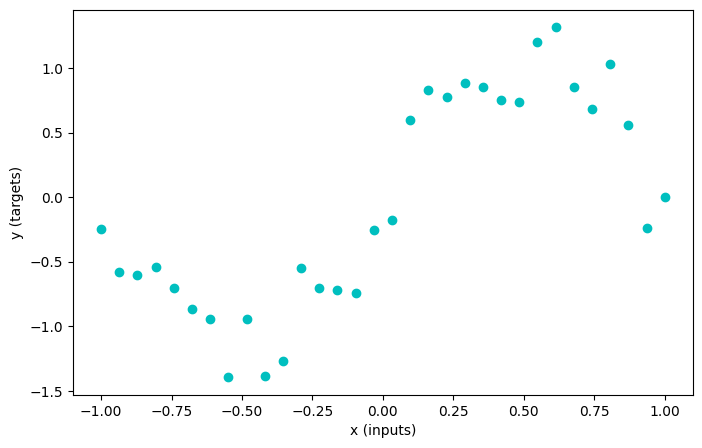

In [ ]:
set_seed(seed=SEED)
n_samples = 32
inputs = torch.linspace(-1.0, 1.0, n_samples).reshape(n_samples, 1)
noise = torch.randn(n_samples, 1) / 4
targets = torch.sin(pi * inputs) + noise
plt.figure(figsize=(8, 5))
plt.scatter(inputs, targets, c='c')
plt.xlabel('x (inputs)')
plt.ylabel('y (targets)')
plt.show()

Let's define a very wide (512 neurons) neural net with one hidden layer and `nn.Tanh()` activation function.

In [ ]:
class WideNet(nn.Module):
  """
   A Wide neural network with a single hidden layer
   Structure is as follows:
   nn.Sequential(
        nn.Linear(1, n_cells) + nn.Tanh(), # Fully connected layer with tanh activation
        nn.Linear(n_cells, 1) # Final fully connected layer
    )
  """

  def __init__(self):
    """
    Initializing the parameters of WideNet

    Args:
      None

    Returns:
      Nothing
    """
    n_cells = 512
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(1, n_cells),
        nn.Tanh(),
        nn.Linear(n_cells, 1),
    )

  def forward(self, x):
    """
    Forward pass of WideNet

    Args:
      x: torch.Tensor
        2D tensor of features

    Returns:
      Torch tensor of model predictions
    """
    return self.layers(x)

We can now create an instance of our neural net and print its parameters.

In [ ]:
# Creating an instance
set_seed(seed=SEED)
wide_net = WideNet()
print(wide_net)

Random seed 2022 has been set.
WideNet(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=512, bias=True)
    (1): Tanh()
    (2): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [ ]:
# Create a mse loss function
loss_function = nn.MSELoss()

# Stochstic Gradient Descent optimizer (you will learn about momentum soon)
lr = 0.003  # Learning rate
sgd_optimizer = torch.optim.SGD(wide_net.parameters(), lr=lr, momentum=0.9)

The training process in PyTorch is interactive - you can perform training iterations as you wish and inspect the results after each iteration.

Let's perform one training iteration. You can run the cell multiple times and see how the parameters are being updated and the loss is reducing. This code block is the core of everything to come: please make sure you go line-by-line through all the commands and discuss their purpose with your pod.

In [ ]:
# Reset all gradients to zero
sgd_optimizer.zero_grad()

# Forward pass (Compute the output of the model on the features (inputs))
prediction = wide_net(inputs)

# Compute the loss
loss = loss_function(prediction, targets)
print(f'Loss: {loss.item()}')

# Perform backpropagation to build the graph and compute the gradients
loss.backward()

# Optimizer takes a tiny step in the steepest direction (negative of gradient)
# and "updates" the weights and biases of the network
sgd_optimizer.step()

Loss: 0.675656795501709


#### Training Loop

Using everything we've learned so far, we ask you to complete the `train` function below.

Random seed 2022 has been set.


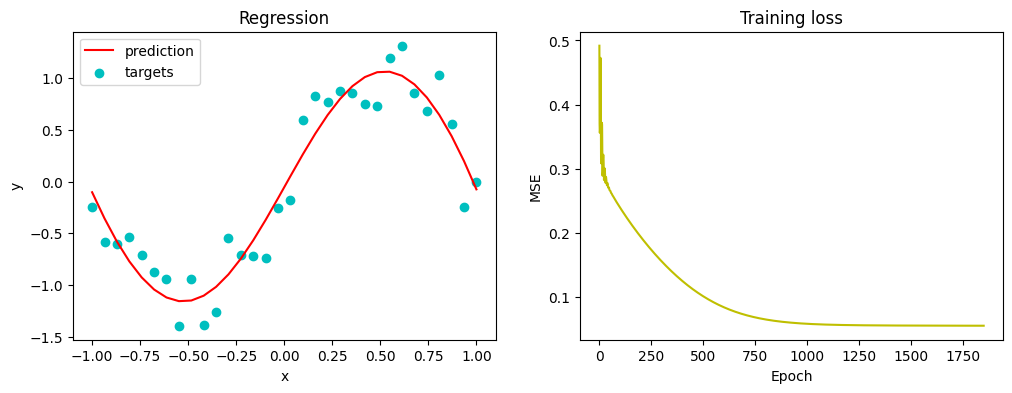

In [ ]:
def train(features, labels, model, loss_fun, optimizer, n_epochs):
  """
  Training function

  Args:
    features: torch.Tensor
      Features (input) with shape torch.Size([n_samples, 1])
    labels: torch.Tensor
      Labels (targets) with shape torch.Size([n_samples, 1])
    model: torch nn.Module
      The neural network
    loss_fun: function
      Loss function
    optimizer: function
      Optimizer
    n_epochs: int
      Number of training iterations

  Returns:
    loss_record: list
      Record (evolution) of training losses
  """
  loss_record = []  # Keeping recods of loss

  for i in range(n_epochs):

    optimizer.zero_grad()  # Set gradients to 0
    predictions = model(features)   # Compute model prediction (output)
    loss = loss_fun(predictions, labels)  # Compute the loss
    loss.backward()  # Compute gradients (backward pass)
    optimizer.step()  # Update parameters (optimizer takes a step)


    loss_record.append(loss.item())
  return loss_record



set_seed(seed=2022)
epochs = 1847 # Cauchy, Exercices d'analyse et de physique mathematique (1847)
losses = train(inputs, targets, wide_net, loss_function, sgd_optimizer, epochs)
ex3_plot(wide_net, inputs, targets, epochs, losses)

**Acknowledgements**

Code adopted from the Deep Learning Summer School offered by Neuromatch Academy

https://deeplearning.neuromatch.io/tutorials/intro.html

# Gradient Descent and Variants Part 1

**Imports**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import time
import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

## Training an MLP for image classification

Many of the core ideas (and tricks) in modern optimization for deep learning can be illustrated in the simple setting of training an MLP to solve an image classification task.


$^\dagger$: A **strictly convex** function has the same global and local minimum - a nice property for optimization as it won't get stuck in a local minimum that isn't a global one (e.g., $f(x)=x^2 + 2x + 1$). A **non-convex** function is wavy - has some 'valleys' (local minima) that aren't as deep as the overall deepest 'valley' (global minimum). Thus, the optimization algorithms can get stuck in the local minimum, and it can be hard to tell when this happens (e.g., $f(x) = x^4 + x^3 - 2x^2 - 2x$).

### Data

We will use the MNIST dataset of handwritten digits. We load the data via the Pytorch `datasets` module



In [ ]:
def load_mnist_data(change_tensors=False, download=False):
  """
  Load training and test examples for the MNIST handwritten digits dataset
  with every image: 28*28 x 1 channel (greyscale image)

  Args:
    change_tensors: Bool
      Argument to check if tensors need to be normalised
    download: Bool
      Argument to check if dataset needs to be downloaded/already exists

  Returns:
    train_set:
      train_data: Tensor
        training input tensor of size (train_size x 784)
      train_target: Tensor
        training 0-9 integer label tensor of size (train_size)
    test_set:
      test_data: Tensor
        test input tensor of size (test_size x 784)
      test_target: Tensor
        training 0-9 integer label tensor of size (test_size)
  """
  # Load train and test sets
  train_set = torchvision.datasets.MNIST(root='.', train=True, download=download,
                             transform=torchvision.transforms.ToTensor())
  test_set = torchvision.datasets.MNIST(root='.', train=False, download=download,
                            transform=torchvision.transforms.ToTensor())

  # Original data is in range [0, 255]. We normalize the data wrt its mean and std_dev.
  # Note that we only used *training set* information to compute mean and std
  mean = train_set.data.float().mean()
  std = train_set.data.float().std()

  if change_tensors:
    # Apply normalization directly to the tensors containing the dataset
    train_set.data = (train_set.data.float() - mean) / std
    test_set.data = (test_set.data.float() - mean) / std
  else:
    tform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize(mean=[mean / 255.], std=[std / 255.])
                                            ])
    train_set = torchvision.datasets.MNIST.MNIST(root='.', train=True, download=download,
                               transform=tform)
    test_set = torchvision.datasets.MNIST.MNIST(root='.', train=False, download=download,
                              transform=tform)

  return train_set, test_set


train_set, test_set = load_mnist_data(change_tensors=True,download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.05MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.44MB/s]


As we are just getting started, we will concentrate on a small subset of only 500 examples out of the 60.000 data points contained in the whole training set.


In [ ]:
# Sample a random subset of 500 indices
subset_index = np.random.choice(len(train_set.data), 500)

# We will use these symbols to represent the training data and labels, to stay
# as close to the mathematical expressions as possible.
X, y = train_set.data[subset_index, :], train_set.targets[subset_index]

Run the following cell to visualize the content of three examples in our training set. Note how the preprocessing we applied to the data changes the range of pixel values after normalization.

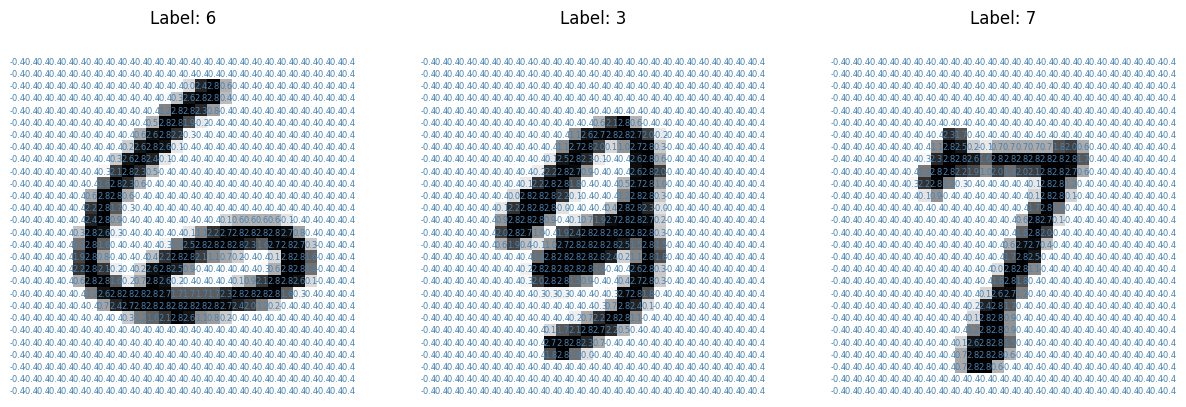

In [ ]:
num_figures = 3
fig, axs = plt.subplots(1, num_figures, figsize=(5 * num_figures, 5))

for sample_id, ax in enumerate(axs):
  # Plot the pixel values for each image
  ax.matshow(X[sample_id, :], cmap='gray_r')
  # 'Write' the pixel value in the corresponding location
  for (i, j), z in np.ndenumerate(X[sample_id, :]):
    text = '{:.1f}'.format(z)
    ax.text(j, i, text, ha='center',
            va='center', fontsize=6, c='steelblue')

  ax.set_title('Label: ' + str(y[sample_id].item()))
  ax.axis('off')

plt.show()

### Model



As you will see next week, there are specific model architectures that are better suited to image-like data, such as Convolutional Neural Networks (CNNs). For simplicity, we will focus exclusively on Multi-Layer Perceptron (MLP) models as they allow us to highlight many important optimization challenges shared with more advanced neural network designs.

In [ ]:
class MLP(nn.Module):
  """
  This class implements MLPs in Pytorch of an arbitrary number of hidden
  layers of potentially different sizes. Since we concentrate on classification
  tasks in this tutorial, we have a log_softmax layer at prediction time.
  """

  def __init__(self, in_dim=784, out_dim=10, hidden_dims=[], use_bias=True):
    """
    Constructs a MultiLayerPerceptron

    Args:
      in_dim: Integer
        dimensionality of input data (784)
      out_dim: Integer
        number of classes (10)
      hidden_dims: List
        containing the dimensions of the hidden layers,
        empty list corresponds to a linear model (in_dim, out_dim)

    Returns:
      Nothing
    """

    super(MLP, self).__init__()

    self.in_dim = in_dim
    self.out_dim = out_dim

    # If we have no hidden layer, just initialize a linear model (e.g. in logistic regression)
    if len(hidden_dims) == 0:
      layers = [nn.Linear(in_dim, out_dim, bias=use_bias)]
    else:
      # 'Actual' MLP with dimensions in_dim - num_hidden_layers*[hidden_dim] - out_dim
      layers = [nn.Linear(in_dim, hidden_dims[0], bias=use_bias), nn.ReLU()]

      # Loop until before the last layer
      for i, hidden_dim in enumerate(hidden_dims[:-1]):
        layers += [nn.Linear(hidden_dim, hidden_dims[i + 1], bias=use_bias),
                   nn.ReLU()]

      # Add final layer to the number of classes
      layers += [nn.Linear(hidden_dims[-1], out_dim, bias=use_bias)]

    self.main = nn.Sequential(*layers)

  def forward(self, x):
    """
    Defines the network structure and flow from input to output

    Args:
      x: Tensor
        Image to be processed by the network

    Returns:
      output: Tensor
        same dimension and shape as the input with probabilistic values in the range [0, 1]

    """
    # Flatten each images into a 'vector'
    transformed_x = x.view(-1, self.in_dim)
    hidden_output = self.main(transformed_x)
    output = F.log_softmax(hidden_output, dim=1)
    return output

Linear models constitute a very special kind of MLPs: they are equivalent to an MLP with *zero* hidden layers. This is simply an affine transformation, in other words a 'linear' map $W x$ with an 'offset' $b$; followed by a softmax function.

$$f(x) = \text{softmax}(W x + b)$$

Here $x \in \mathbb{R}^{784}$, $W \in \mathbb{R}^{10 \times 784}$ and $b \in \mathbb{R}^{10}$. Notice that the dimensions of the weight matrix are $10 \times 784$ as the input tensors are flattened images, i.e., $28 \times 28 = 784$-dimensional tensors and the output layer consists of $10$ nodes. Also, note that the implementation of softmax encapsulates b in W i.e., It maps the rows of the input instead of the columns. That is, the i’th row of the output is the mapping of the i’th row of the input under W, plus the bias term. Refer Affine maps here: https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html#affine-maps

In [ ]:
# Empty hidden_dims means we take a model with zero hidden layers.
model = MLP(in_dim=784, out_dim=10, hidden_dims=[])

# We print the model structure with 784 inputs and 10 outputs
print(model)

MLP(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)


### Loss


While we care about the accuracy of the model, the 'discrete' nature of the 0-1 loss makes it challenging to optimize. In order to learn good parameters for this model, we will use the cross entropy loss (negative log-likelihood), which you saw in the last lecture, as a surrogate objective to be minimized.

This particular choice of model and optimization objective leads to a *convex* optimization problem with respect to the parameters $W$ and $b$.

In [ ]:
loss_fn = F.nll_loss

### Implement gradient descent

In [ ]:
def zero_grad(params):
  """
  Clear gradients as they accumulate on successive backward calls

  Args:
    params: an iterator over tensors
      i.e., updating the Weights and biases

  Returns:
    Nothing
  """
  for par in params:
    if not(par.grad is None):
      par.grad.data.zero_()

In [ ]:
def gradient_update(loss, params, lr=1e-3):
  """
  Perform a gradient descent update on a given loss over a collection of parameters

  Args:
    loss: Tensor
      A scalar tensor containing the loss through which the gradient will be computed
    params: List of iterables
      Collection of parameters with respect to which we compute gradients
    lr: Float
      Scalar specifying the learning rate or step-size for the update

  Returns:
    Nothing
  """
  # Clear up gradients as Pytorch automatically accumulates gradients from
  # successive backward calls
  zero_grad(params)

  # Compute gradients on given objective
  loss.backward()

  with torch.no_grad():
    for par in params:
      # Here we work with the 'data' attribute of the parameter rather than the
      # parameter itself.
      # Hence - use the learning rate and the parameter's .grad.data attribute to perform an update
      par.data -= lr * par.grad.data



model1 = MLP(in_dim=784, out_dim=10, hidden_dims=[])
print('\n The model1 parameters before the update are: \n')
for name, param in model1.named_parameters():
    if param.requires_grad:
      print(name, param.data)
loss = loss_fn(model1(X), y)

gradient_update(loss, list(model1.parameters()), lr=1e-1)
print('\n The model1 parameters after the update are: \n')
for name, param in model1.named_parameters():
    if param.requires_grad:
      print(name, param.data)


 The model1 parameters before the update are: 

main.0.weight tensor([[ 0.0048, -0.0103, -0.0197,  ...,  0.0345,  0.0148,  0.0299],
        [ 0.0101, -0.0334,  0.0023,  ..., -0.0207, -0.0227,  0.0229],
        [ 0.0104, -0.0341,  0.0148,  ..., -0.0137,  0.0010,  0.0163],
        ...,
        [-0.0255, -0.0332,  0.0315,  ..., -0.0241,  0.0281,  0.0003],
        [-0.0207, -0.0270,  0.0242,  ..., -0.0046, -0.0286, -0.0276],
        [-0.0125, -0.0173, -0.0154,  ...,  0.0020,  0.0078, -0.0297]])
main.0.bias tensor([-0.0221,  0.0169, -0.0311, -0.0310, -0.0078,  0.0246,  0.0209, -0.0199,
         0.0153, -0.0112])

 The model1 parameters after the update are: 

main.0.weight tensor([[ 0.0032, -0.0119, -0.0213,  ...,  0.0329,  0.0132,  0.0283],
        [ 0.0090, -0.0346,  0.0011,  ..., -0.0219, -0.0239,  0.0218],
        [ 0.0120, -0.0325,  0.0164,  ..., -0.0121,  0.0026,  0.0179],
        ...,
        [-0.0261, -0.0337,  0.0309,  ..., -0.0247,  0.0275, -0.0003],
        [-0.0208, -0.0270,  0

**Acknowledgements**

Code adopted from the Deep Learning Summer School offered by Neuromatch Academy

https://deeplearning.neuromatch.io/tutorials/intro.html

# Gradient Descent and Variants 2

## Gradient Descent Variants

### Pathological curvatures

A pathological curvature is a type of surface that is similar to ravines and is particularly tricky for plain SGD optimization. In words, pathological curvatures typically have a steep gradient in one direction with an optimum at the center, while in a second direction we have a slower gradient towards a (global) optimum. Let’s first create an example surface of this and visualize it:

In [ ]:
import os
import json
import math
import numpy as np
import copy

## Imports for plotting
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

<ipython-input-70-9e17b0ce7e1a>:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [ ]:
def pathological_curve_loss(w1, w2):
    # Example of a pathological curvature. There are many more possible, feel free to experiment here!
    x1_loss = torch.tanh(w1)**2 + 0.01 * torch.abs(w1)
    x2_loss = torch.sigmoid(w2)
    return x1_loss + x2_loss

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


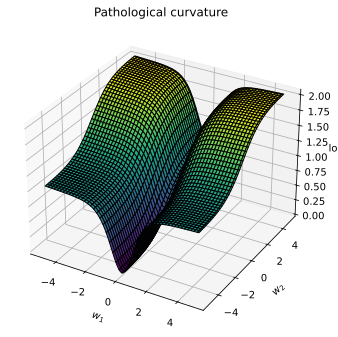

In [ ]:
def plot_curve(curve_fn, x_range=(-5,5), y_range=(-5,5), plot_3d=False, cmap=cm.viridis, title="Pathological curvature"):
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d') if plot_3d else fig.gca()

    x = torch.arange(x_range[0], x_range[1], (x_range[1]-x_range[0])/100.)
    y = torch.arange(y_range[0], y_range[1], (y_range[1]-y_range[0])/100.)
    x, y = torch.meshgrid([x,y])
    z = curve_fn(x, y)
    x, y, z = x.numpy(), y.numpy(), z.numpy()

    if plot_3d:
        ax.plot_surface(x, y, z, cmap=cmap, linewidth=1, color="#000", antialiased=False)
        ax.set_zlabel("loss")
    else:
        ax.imshow(z.T[::-1], cmap=cmap, extent=(x_range[0], x_range[1], y_range[0], y_range[1]))
    plt.title(title)
    ax.set_xlabel(r"$w_1$")
    ax.set_ylabel(r"$w_2$")
    plt.tight_layout()
    return ax

sns.reset_orig()
_ = plot_curve(pathological_curve_loss, plot_3d=True)
plt.show()

In [ ]:
def train_curve(optimizer_func, curve_func=pathological_curve_loss, num_updates=100, init=[5,5]):
    """
    Inputs:
        optimizer_func - Constructor of the optimizer to use. Should only take a parameter list
        curve_func - Loss function (e.g. pathological curvature)
        num_updates - Number of updates/steps to take when optimizing
        init - Initial values of parameters. Must be a list/tuple with two elements representing w_1 and w_2
    Outputs:
        Numpy array of shape [num_updates, 3] with [t,:2] being the parameter values at step t, and [t,2] the loss at t.
    """
    weights = nn.Parameter(torch.FloatTensor(init), requires_grad=True)
    optimizer = optimizer_func([weights])

    list_points = []
    for _ in range(num_updates):
        loss = curve_func(weights[0], weights[1])
        list_points.append(torch.cat([weights.data.detach(), loss.unsqueeze(dim=0).detach()], dim=0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    points = torch.stack(list_points, dim=0).numpy()
    return points

In [ ]:
SGD_points = train_curve(lambda params: torch.optim.SGD(params, lr=10))
SGDMom_points = train_curve(lambda params: torch.optim.SGD(params, lr=10, momentum=0.9))
Nest_points = train_curve(lambda params: torch.optim.SGD(params, lr=10, momentum=0.9,nesterov=True))
Adagrad_points = train_curve(lambda params: torch.optim.Adagrad(params, lr=10))
RMSprop_points = train_curve(lambda params: torch.optim.RMSprop(params, lr=10,alpha = 0.1))
Adam_points = train_curve(lambda params: torch.optim.Adam(params, lr=10))

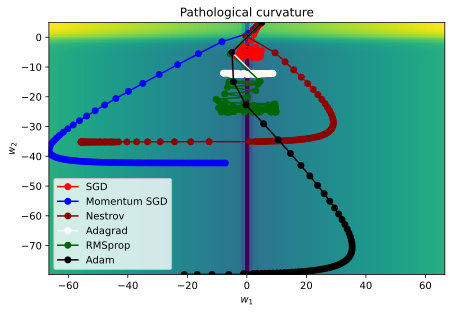

In [ ]:
all_points = np.concatenate([SGD_points, SGDMom_points, Nest_points, Adagrad_points,RMSprop_points,Adam_points], axis=0)
ax = plot_curve(pathological_curve_loss,
                x_range=(-np.absolute(all_points[:,0]).max(), np.absolute(all_points[:,0]).max()),
                y_range=(all_points[:,1].min(), all_points[:,1].max()),
                plot_3d=False)
ax.plot(SGD_points[:,0], SGD_points[:,1], color="red", marker="o", label="SGD")
ax.plot(SGDMom_points[:,0], SGDMom_points[:,1], color="blue", marker="o",  label="Momentum SGD")
ax.plot(Nest_points[:,0], Nest_points[:,1], color="darkred", marker="o",  label="Nestrov")
ax.plot(Adagrad_points[:,0], Adagrad_points[:,1], color="snow", marker="o",  label="Adagrad")
ax.plot(RMSprop_points[:,0], RMSprop_points[:,1], color="darkgreen", marker="o",  label="RMSprop")
ax.plot(Adam_points[:,0], Adam_points[:,1], color="black", marker="o", label="Adam")
plt.legend()
plt.show()

### Steep optima
A second type of challenging loss surfaces are steep optima. In those, we have a larger part of the surface having very small gradients while around the optimum, we have very large gradients. For instance, take the following loss surfaces:

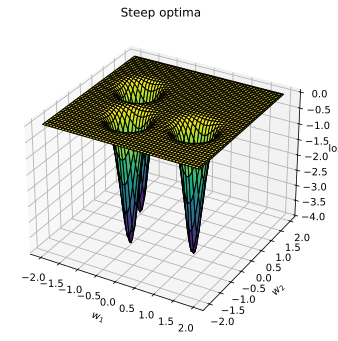

In [ ]:
def bivar_gaussian(w1, w2, x_mean=0.0, y_mean=0.0, x_sig=1.0, y_sig=1.0):
    norm = 1 / (2 * np.pi * x_sig * y_sig)
    x_exp = (-1 * (w1 - x_mean)**2) / (2 * x_sig**2)
    y_exp = (-1 * (w2 - y_mean)**2) / (2 * y_sig**2)
    return norm * torch.exp(x_exp + y_exp)

def comb_func(w1, w2):
    z = -bivar_gaussian(w1, w2, x_mean=1.0, y_mean=-0.5, x_sig=0.2, y_sig=0.2)
    z -= bivar_gaussian(w1, w2, x_mean=-1.0, y_mean=0.5, x_sig=0.2, y_sig=0.2)
    z -= bivar_gaussian(w1, w2, x_mean=-0.5, y_mean=-0.8, x_sig=0.2, y_sig=0.2)
    return z

_ = plot_curve(comb_func, x_range=(-2,2), y_range=(-2,2), plot_3d=True, title="Steep optima")

In [ ]:
SGD_points = train_curve(lambda params: torch.optim.SGD(params, lr=0.05),comb_func, init=[0,0])
SGDMom_points = train_curve(lambda params: torch.optim.SGD(params, lr=0.05, momentum=0.9),comb_func, init=[0,0])
Nest_points = train_curve(lambda params: torch.optim.SGD(params, lr=0.05, momentum=0.9,nesterov=True),comb_func, init=[0,0])
Adagrad_points = train_curve(lambda params: torch.optim.Adagrad(params, lr=0.05),comb_func, init=[0,0])
RMSprop_points = train_curve(lambda params: torch.optim.RMSprop(params, lr=0.05,alpha = 0.1),comb_func, init=[0,0])
Adam_points = train_curve(lambda params: torch.optim.Adam(params, lr=0.05),comb_func, init=[0,0])

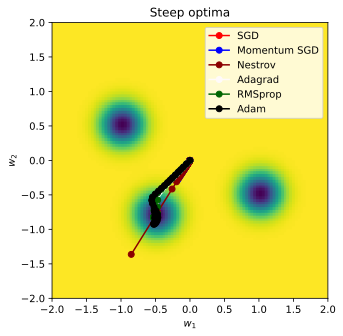

In [ ]:
all_points = np.concatenate([SGD_points, SGDMom_points, Nest_points, Adagrad_points,RMSprop_points,Adam_points], axis=0)
ax = plot_curve(comb_func,
                x_range=(-2, 2),
                y_range=(-2, 2),
                plot_3d=False,
                title="Steep optima")
ax.plot(SGD_points[:,0], SGD_points[:,1], color="red", marker="o",label="SGD")
ax.plot(SGDMom_points[:,0], SGDMom_points[:,1], color="blue", marker="o", label="Momentum SGD")
ax.plot(Nest_points[:,0], Nest_points[:,1], color="darkred", marker="o",  label="Nestrov")
ax.plot(Adagrad_points[:,0], Adagrad_points[:,1], color="snow", marker="o", label="Adagrad")
ax.plot(RMSprop_points[:,0], RMSprop_points[:,1], color="darkgreen", marker="o", label="RMSprop")
ax.plot(Adam_points[:,0], Adam_points[:,1], color="black", marker="o", label="Adam")
plt.legend()
plt.show()